### Check losses behave in a valid way

compare two identical images
an image to all zeros, to all ones
and an image to a noisy version of itself.

In [1]:
from twaidata.torchdatasets.slice_dataset_2D import MRISegmentation2DDataset
from trustworthai.utils.losses_and_metrics.tversky_loss import TverskyLoss
from trustworthai.utils.losses_and_metrics.misc_metrics import IOU
from trustworthai.utils.losses_and_metrics.dice import dice
from torch.nn import BCELoss, MSELoss
import matplotlib.pyplot as plt

from trustworthai.utils.augmentation.standard_transforms import RandomFlip, GaussianBlur, GaussianNoise, \
                                                            RandomResizeCrop, RandomAffine, \
                                                            NormalizeImg, PairedCompose, LabelSelect, \
                                                            PairedCentreCrop, CropZDim

import torch

In [10]:
transforms = PairedCompose([
        RandomFlip(p=0.5, orientation="horizontal"),
        GaussianBlur(p=0.5, kernel_size=7, sigma=(.1, 1.5)),
        GaussianNoise(p=0.2, mean=0, sigma=0.2),
        RandomAffine(p=0.2, shear=(.1,3.)),
        RandomAffine(p=0.2, degrees=5),
        RandomResizeCrop(p=1., scale=(0.6, 1.), ratio=(3./4., 4./3.))
    ])

In [11]:
dataset = MRISegmentation2DDataset("/disk/scratch/s2208943/data/merged_data", "Singapore", transforms)

In [12]:
img, label = dataset[751]

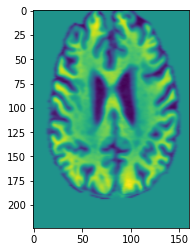

In [13]:
plt.imshow(img[1])

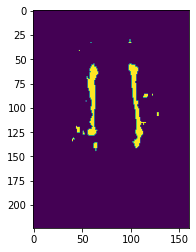

In [14]:
plt.imshow(label[0])

In [31]:
loss = TverskyLoss()

In [34]:
loss(label, label), dice(label, label)

(tensor(0.), tensor(1.))

In [35]:
ones = torch.ones(label.shape)
zeros = torch.zeros(label.shape)

In [36]:
loss(ones, label), loss(label, ones)

(tensor(0.9159), tensor(0.9621))

In [37]:
loss(zeros, label), loss(label, zeros)

(tensor(1.), tensor(1.))

In [38]:
noise = torch.randn(label.shape)

In [42]:
loss(torch.abs(noise*0.025 + label), label), dice(torch.abs(noise*0.0025 + label), label)

(tensor(0.1789), tensor(0.9650))

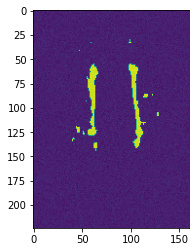

In [40]:
plt.imshow((noise * 0.025 + label)[0])

In [ ]:
torch